In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('bmh')

from sklearn.linear_model import LinearRegression 

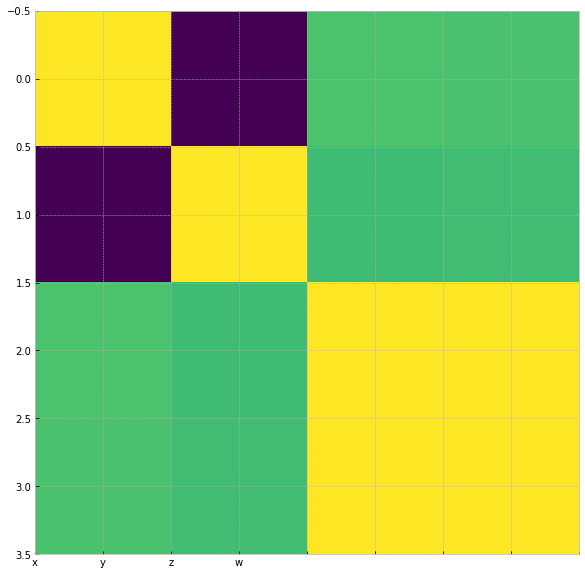

          x         y         z         w
x  1.000000 -0.007759  0.716215  0.712520
y -0.007759  1.000000  0.688840  0.689014
z  0.716215  0.688840  1.000000  0.997281
w  0.712520  0.689014  0.997281  1.000000


In [22]:
n = 500

x = np.random.normal(size=n)
y = np.random.normal(size=n)

# a = x + np.random.normal(scale=0.4, size=n)
z = x + y + np.random.normal(scale=0.1, size=n)
w = z + np.random.normal(scale=0.1, size=n)

data = pd.DataFrame({
    'x': x,
    'y': y,
    'z': z,
    'w': w,
})

corr = data.corr()

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.imshow(corr.to_numpy())
ax.set_xticklabels(data.columns)
plt.show()

print(corr)

In [23]:
from scipy.stats import linregress
from itertools import product

graph = np.ones((4, 4))

for i, f1 in enumerate(data.columns):
    for f2 in data.columns[i+1:]:
        print(f'{f1}, {f2}')
        print(linregress(data[f1], data[f2]))
        print('----------------------------')
        print(linregress(data[f1], data[f2]))

x, y
LinregressResult(slope=-0.007478837669602652, intercept=0.011534440496373494, rvalue=-0.0077594336264753, pvalue=0.8625928285710641, stderr=0.043189317218173665, intercept_stderr=0.044061957938106036)
----------------------------
LinregressResult(slope=-0.007478837669602652, intercept=0.011534440496373494, rvalue=-0.0077594336264753, pvalue=0.8625928285710641, stderr=0.043189317218173665, intercept_stderr=0.044061957938106036)
x, z
LinregressResult(slope=0.9889140215039225, intercept=0.012884758586111905, rvalue=0.7162153517176781, pvalue=7.94058240919946e-80, stderr=0.04317979516930195, intercept_stderr=0.044052243496112184)
----------------------------
LinregressResult(slope=0.9889140215039225, intercept=0.012884758586111905, rvalue=0.7162153517176781, pvalue=7.94058240919946e-80, stderr=0.04317979516930195, intercept_stderr=0.044052243496112184)
x, w
LinregressResult(slope=0.984433717277734, intercept=0.01615057000798223, rvalue=0.7125196494060345, pvalue=1.1699324926830708e-78

correlation w, x conditioned on z
LinregressResult(slope=-0.004480304226188649, intercept=0.0032658114218703615, rvalue=-0.043985797387573626, pvalue=0.32631383532537417, stderr=0.004559947383928875, intercept_stderr=0.004652081180531036)
LinregressResult(slope=0.48093828158037316, intercept=-0.01196809097782382, rvalue=0.6895329001891991, pvalue=8.697142168305229e-72, stderr=0.02263657943034625, intercept_stderr=0.03190885612592318)
LinregressResult(slope=-0.4791970762852934, intercept=0.007282434808460142, rvalue=-0.6824354645309341, pvalue=8.568151045090751e-70, stderr=0.022999749472041166, intercept_stderr=0.032397808394165735)
correlation w, y conditioned on z
LinregressResult(slope=0.0008730829527929852, intercept=0.0030979899009269227, rvalue=0.008261607482182057, pvalue=0.853796992333969, stderr=0.004735452210684815, intercept_stderr=0.004653953051041917)


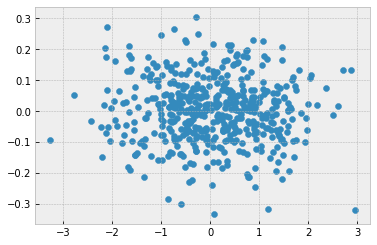

In [26]:
from sklearn.linear_model import LinearRegression

# remove edge x to b
# model_xa = LinearRegression()
# model_xa.fit(x.reshape(-1, 1), a)

print('correlation w, x conditioned on z')
print(linregress(x, w - z))
print(linregress(w, z - x))
print(linregress(z, x - w))
print('correlation w, y conditioned on z')
print(linregress(y, w - z))

plt.scatter(x, w-z)